In [28]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


# 은행의 마케팅 데이터 분석을 통한 정기 예금 가입 가능성 예측
## 분석 목표
- 마케팅 데이터를 활용하여 고객의 직업군, 교욱 수준, 나이, 과거 마케팅 캠페인의 성공여부 등의 요인에 따른  정기 예금 가입 가능성을 예측합니다.
- 예측한 결과를 바탕으로 한 마케팅 계획 수립하여 비즈니스 전략을 제시합니다.

# 1. 데이터 확인
## 1) 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

df = pd.read_csv('data/bank-additional-full.csv')

In [2]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                        --------------  ----- 
 0   age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"  41188 non-null  object
dtypes: object(1)
memory usage: 321.9+ KB


(41188, 1)

- 해당 데이터는 한 컬럼에 모든 데이터가 들어있어 컬럼 분할이 필요해 보임.

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep=";")

df = df.apply(lambda s: s.astype(str).str.strip('"')) # 따옴표 제거

# 컬럼이 정리된 데이터프레임 저장 (필요시)
# df.to_csv('data/bank_clean.csv')
# df = pd.read_csv('data/bank_clean.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41188 non-null  object
 1   job             41188 non-null  object
 2   marital         41188 non-null  object
 3   education       41188 non-null  object
 4   default         41188 non-null  object
 5   housing         41188 non-null  object
 6   loan            41188 non-null  object
 7   contact         41188 non-null  object
 8   month           41188 non-null  object
 9   day_of_week     41188 non-null  object
 10  duration        41188 non-null  object
 11  campaign        41188 non-null  object
 12  pdays           41188 non-null  object
 13  previous        41188 non-null  object
 14  poutcome        41188 non-null  object
 15  emp.var.rate    41188 non-null  object
 16  cons.price.idx  41188 non-null  object
 17  cons.conf.idx   41188 non-null  object
 18  euribo

In [21]:
pd.set_option('display.max_columns', None)
df.head()
# df = df.drop(columns=["Unnamed: 0"])
# df.shape

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# df["poutcome"].unique()
# df["education"].unique()
# df["y"].unique()
# df["nr.employed"].unique()
df.dtypes


age               object
job               object
marital           object
education         object
default           object
housing           object
loan              object
contact           object
month             object
day_of_week       object
duration          object
campaign          object
pdays             object
previous          object
poutcome          object
emp.var.rate      object
cons.price.idx    object
cons.conf.idx     object
euribor3m         object
nr.employed       object
y                 object
dtype: object

## 2) 데이터 정리
- 모든 데이터가 문자형(object)로 되어 있으므로 데이터 개요에 맞게 변형 필요
- 데이터 개요 (변수 설명)

| 컬럼명 | 설명 |
|--------|------|
| age | 나이 (숫자) |
| job | 직업 (범주형) |
| marital | 결혼 여부 (범주형) |
| education | 교육 수준 (범주형) |
| default | 신용 불량 여부 (범주형) |
| housing | 주택 대출 여부 (범주형) |
| loan | 개인 대출 여부 (범주형) |
| contact | 연락 유형 (범주형) |
| month | 마지막 연락 월 (범주형) |
| day_of_week | 마지막 연락 요일 (범주형) |
| duration | 마지막 연락 지속 시간, 초 단위 (숫자) |
| campaign | 캠페인 동안 연락 횟수 (숫자) |
| pdays | 이전 캠페인 후 지난 일수 (숫자) |
| previous | 이전 캠페인 동안 연락 횟수 (숫자) |
| poutcome | 이전 캠페인의 결과 (범주형) |
| emp.var.rate | 고용 변동률 (숫자) |
| cons.price.idx | 소비자 물가지수 (숫자) |
| cons.conf.idx | 소비자 신뢰지수 (숫자) |
| euribor3m | 3개월 유리보 금리 (숫자) |
| nr.employed | 고용자 수 (숫자) |
| y | 정기 예금 가입 여부 ('yes' 또는 'no') |


In [23]:
# 숫자형으로 변환할 컬럼들
num_cols = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")  # 숫자로 변환, 변환 불가는 NaN


# 범주형으로 변환할 컬럼들
#cat_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"]

#for col in cat_cols:
#    if col in df.columns:
#        df[col] = df[col].astype("category")


# 정기 예금 가입 여부. yes = 1 , no = 0 으로 변환
df["y"] = df["y"].map({"no": 0, "yes": 1})

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


- 결측치 확인

In [25]:
df.isnull().sum()
# 결측치 없음

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

- 이상치 확인

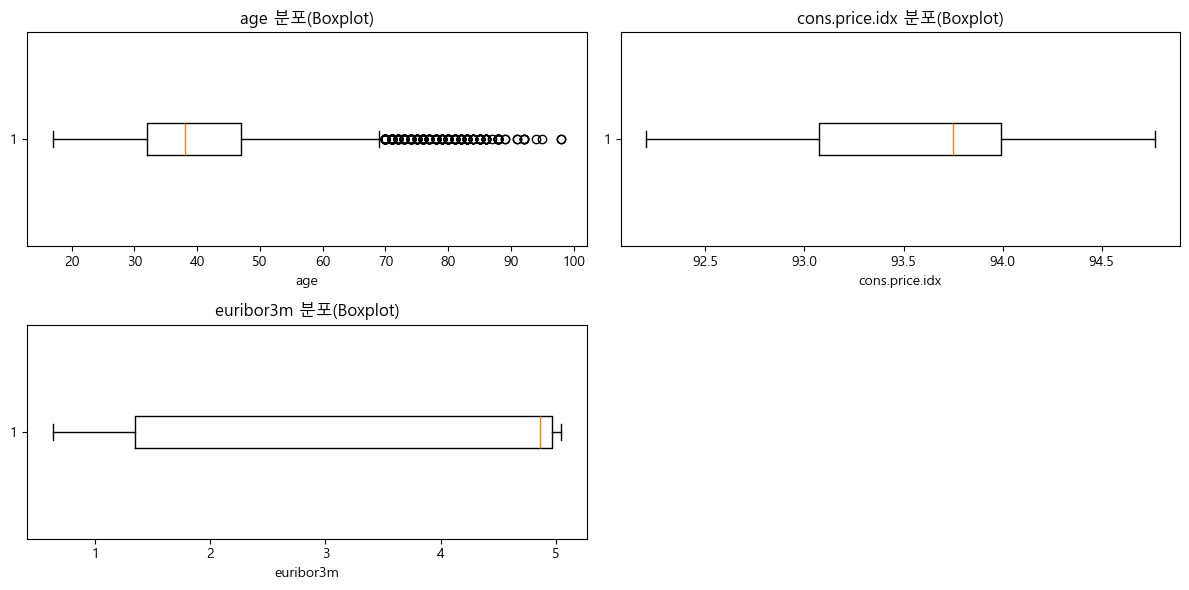

In [29]:

num_cols = ["age", "cons.price.idx", "euribor3m"]
plt.figure(figsize=(12, 6))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[col], vert=False)
    plt.title(f"{col} 분포(Boxplot)")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

- 가입 여부에 영향을 미치는 주요인으로 생각되는 컬럼들에 대한 이상치 탐색.
- 나이(age)에 이상치 확인하였으나 수용할 수 있는 범위의 데이터이므로 데이터유지 결정.


# 2. EDA
- 정기 예금 가입률에 영향을 미칠 것으로 예상되는 요인들을 대상으로 데이터 분석.

## 1) 직업군 별 정기 예금 가입률

C:\Users\Good-PC\AppData\Local\Temp\ipykernel_6040\2380222455.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=job_subscribe, x="job", y="y", palette="viridis")


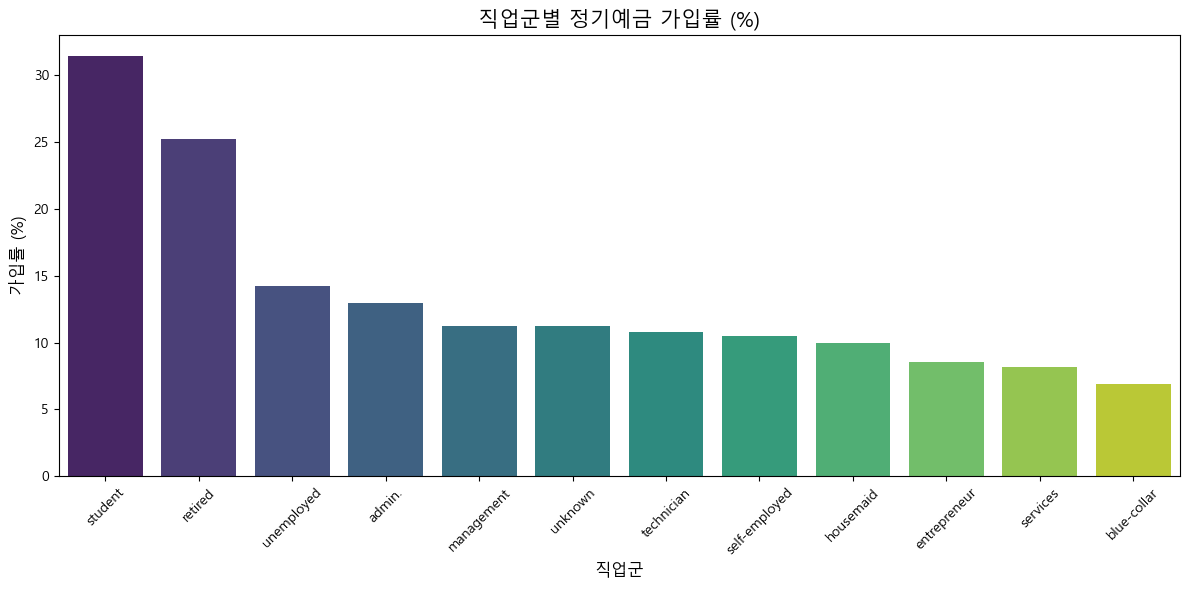

In [30]:
job_subscribe = (
    df.groupby("job")["y"]
      .mean() * 100
).reset_index().sort_values(by="y", ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=job_subscribe, x="job", y="y", palette="viridis")

plt.title("직업군별 정기예금 가입률 (%)", fontsize=15)
plt.xlabel("직업군", fontsize=12)
plt.ylabel("가입률 (%)", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- 학생 혹은 은퇴한 고객에게서 정기 예금 가입률이 가장 높게 나타남.
- 서비스업 종사자, 육체 노동자가 정기 예금 가입률은 가장 낮게 나타나며 그 외 기업인과 주부, 자영업자 순으로 가입률이 낮게 나타나는 것을 확인.
- 특정 직업군에 정기 예금 가입률은 유의미한 차이를 나타냄.

## 2) 교육 수준별 정기 예금 가입률

C:\Users\Good-PC\AppData\Local\Temp\ipykernel_6040\92109134.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=edu_subscribe, x="education", y="y", palette="cubehelix")


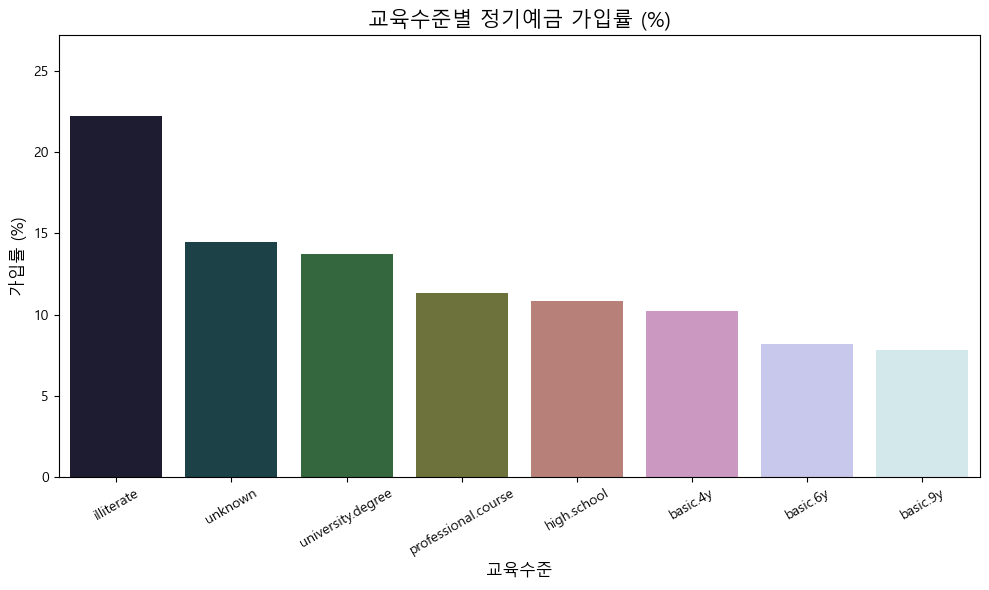

In [31]:
edu_subscribe = (
    df.groupby("education")["y"]
      .mean() * 100  # 비율(%)로 변환
).reset_index().sort_values(by="y", ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=edu_subscribe, x="education", y="y", palette="cubehelix")

# 그래프 꾸미기
plt.title("교육수준별 정기예금 가입률 (%)", fontsize=15)
plt.xlabel("교육수준", fontsize=12)
plt.ylabel("가입률 (%)", fontsize=12)
plt.xticks(rotation=30)
plt.ylim(0, edu_subscribe["y"].max() + 5)
plt.tight_layout()
plt.show()

- 교육 수준별 정기 예금 가입률의 상관관계는 유의미 하지 않은 것으로 판단됨
- 초등교육 수료자와 고등교육 수료자와의 가입률의 차이는 크지 않으며 외려 문맹인 고객의 예금가입률이 높게 나타남.

## 3) 결혼 여부에 따른 정기 예금 가입률

/tmp/ipython-input-1749069192.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=marital_subscribe, x="marital", y="y", palette="flare")


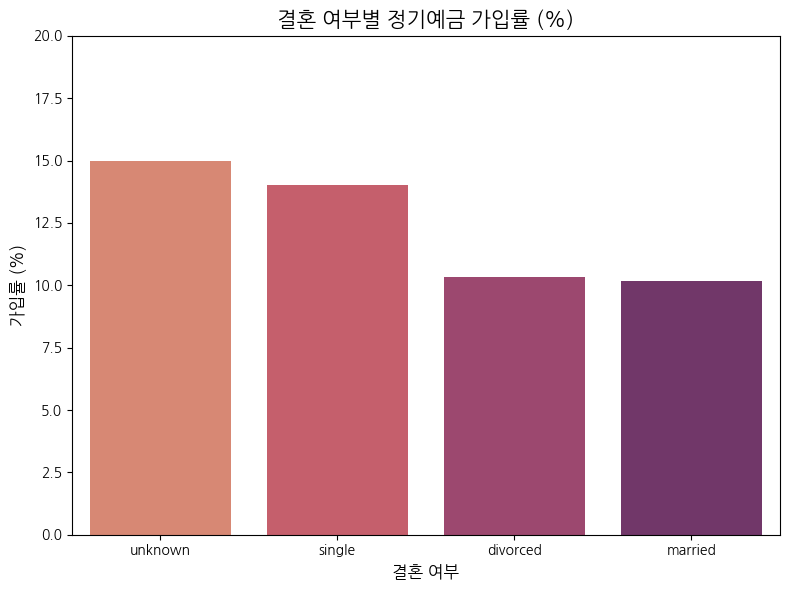

In [ ]:
marital_subscribe = (
    df.groupby("marital")["y"]
      .mean() * 100
).reset_index().sort_values(by="y", ascending=False)

# 시각화
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=marital_subscribe, x="marital", y="y", palette="flare")


plt.title("결혼 여부별 정기예금 가입률 (%)", fontsize=15)
plt.xlabel("결혼 여부", fontsize=12)
plt.ylabel("가입률 (%)", fontsize=12)
plt.ylim(0, marital_subscribe["y"].max() + 5)
plt.tight_layout()

- 이혼, 기혼 고객보다 미혼의 고객에게서 정기 예금 가입률이 높게 나타남.

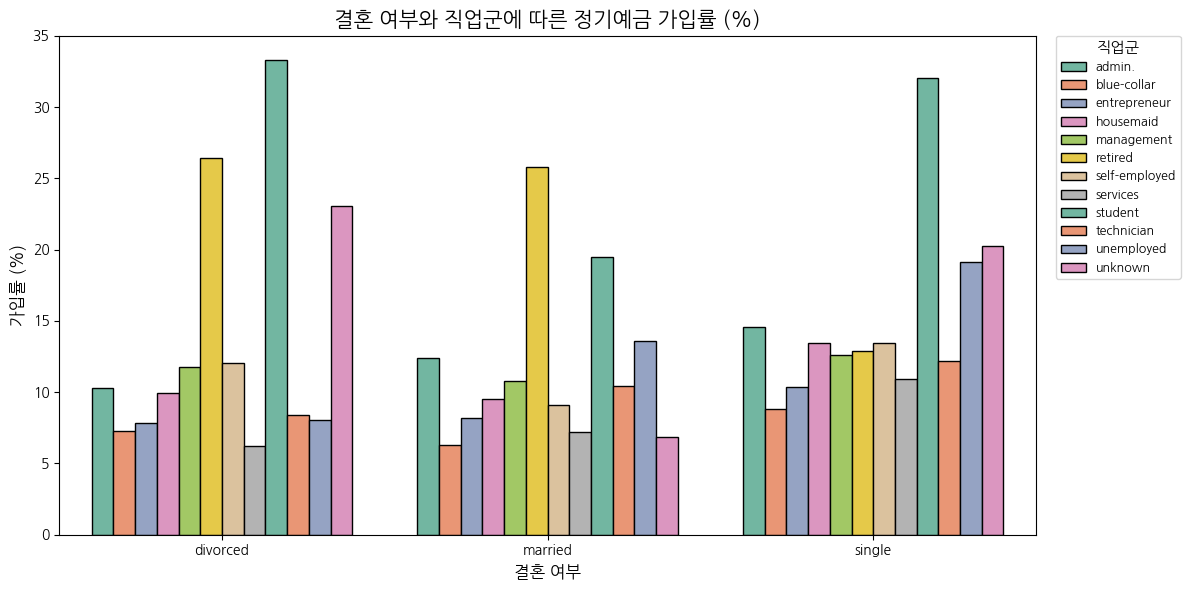

In [ ]:

# 'unknown' job 제외
df_marital = df[df["marital"] != "unknown"]

# 결혼 여부 + 직업군별 가입률(%) 계산
cross_rate = (
    df_marital.groupby(["marital", "job"])["y"]
      .mean() * 100
).reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(
    data=cross_rate,
    x="marital",
    y="y",
    hue="job",
    palette="Set2",    # 🎨 색 구분이 잘 되는 팔레트
    edgecolor="black"  # 막대 테두리 강조로 시각적 구분 강화
)

# 그래프 꾸미기
plt.title("결혼 여부와 직업군에 따른 정기예금 가입률 (%)", fontsize=15)
plt.xlabel("결혼 여부", fontsize=12)
plt.ylabel("가입률 (%)", fontsize=12)

# 범례 위치 및 디자인 조정
plt.legend(
    title="직업군",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0,
    fontsize=9,
    title_fontsize=11
)

plt.tight_layout()
plt.show()

- 기혼자의 경우 은퇴하였거나 학생인 경우에 가입률이 높게 나타나며, 미혼자의 경우에는 학생인 경우 가입률이 높게 확인됨.
- 이혼자의 경우도 마찬가지로 학생이거나 은퇴한 경우 가입률이 높게 확인됨.

## 4) 대출 여부에 따른 정기 예금 가입률

C:\Users\Good-PC\AppData\Local\Temp\ipykernel_6040\2451651823.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Good-PC\AppData\Local\Temp\ipykernel_6040\2451651823.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


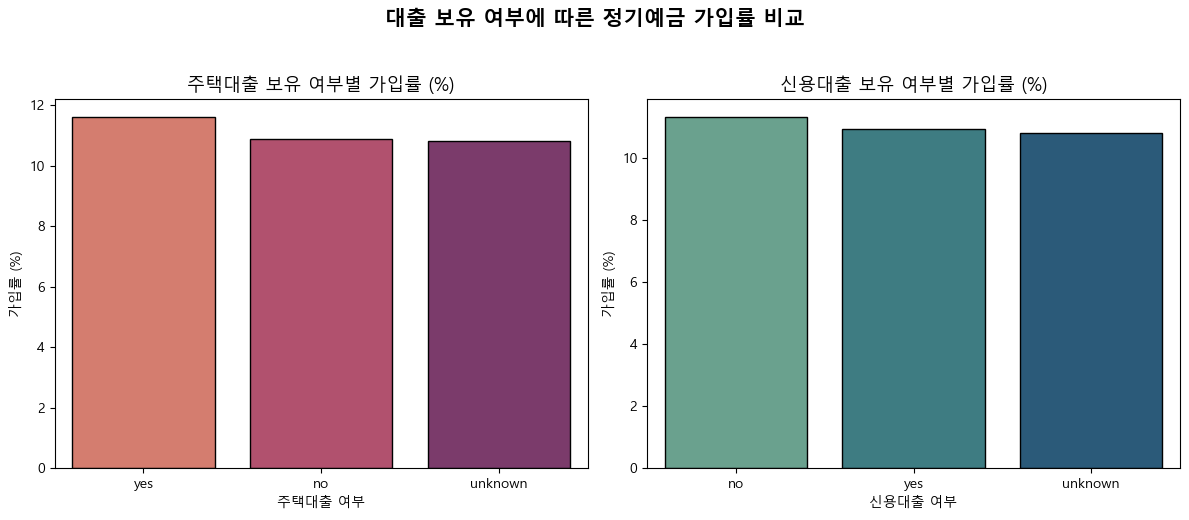

In [37]:
# 주택 대출 여부별 가입률
housing_rate = (
    df.groupby("housing")["y"]
      .mean() * 100
).reset_index().sort_values(by="y", ascending=False)

# 신용 대출 여부별 가입률
loan_rate = (
    df.groupby("loan")["y"]
      .mean() * 100
).reset_index().sort_values(by="y", ascending=False)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

palette_housing = "flare"
palette_loan = "crest"

# --- (왼쪽) 주택대출 그래프 ---
sns.barplot(
    data=housing_rate, x="housing", y="y",
    palette=palette_housing, edgecolor="black", ax=axes[0]
)
axes[0].set_title("주택대출 보유 여부별 가입률 (%)", fontsize=13)
axes[0].set_xlabel("주택대출 여부")
axes[0].set_ylabel("가입률 (%)")

# --- (오른쪽) 신용대출 그래프 ---
sns.barplot(
    data=loan_rate, x="loan", y="y",
    palette=palette_loan, edgecolor="black", ax=axes[1]
)
axes[1].set_title("신용대출 보유 여부별 가입률 (%)", fontsize=13)
axes[1].set_xlabel("신용대출 여부")
axes[1].set_ylabel("가입률 (%)")

plt.suptitle("대출 보유 여부에 따른 정기예금 가입률 비교", fontsize=15, fontweight="bold", y=1.03)
plt.tight_layout()
plt.show()

- 주택 대출과 신용 대출에 따른 가입률은 유의미한 차이를 찾기 어려움.

## 5) 과거 마케팅 캠페인 성공 여부에 따른 정기 예금 가입률

C:\Users\Good-PC\AppData\Local\Temp\ipykernel_6040\3395615721.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


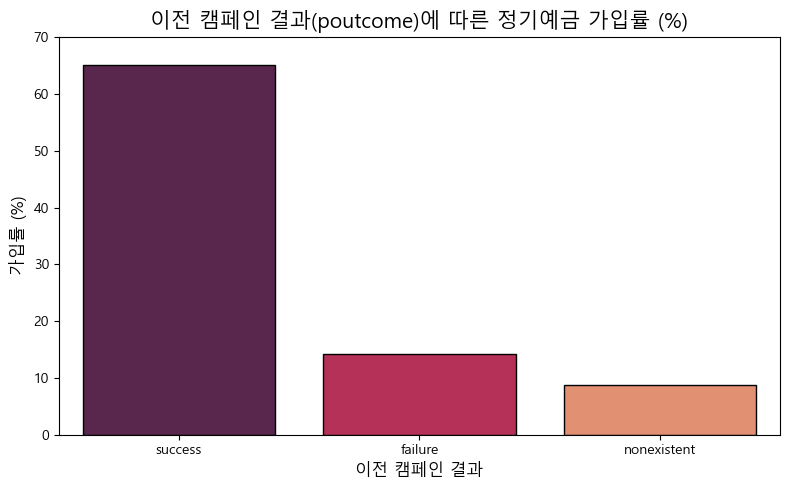

In [38]:
poutcome_rate = (
    df.groupby("poutcome")["y"]
      .mean() * 100
).reset_index().sort_values(by="y", ascending=False)

# 시각화
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=poutcome_rate,
    x="poutcome",
    y="y",
    palette="rocket",
    edgecolor="black"
)

# 그래프 꾸미기
plt.title("이전 캠페인 결과(poutcome)에 따른 정기예금 가입률 (%)", fontsize=15)
plt.xlabel("이전 캠페인 결과", fontsize=12)
plt.ylabel("가입률 (%)", fontsize=12)
plt.ylim(0, poutcome_rate["y"].max() + 5)
plt.tight_layout()
plt.show()

- 당연하게도 이전 마케팅 캠페인의 결과가 성공적으로 판단되는 고객들은 가입률이 매우 높게 나타남.

## 6) 나이대별 정기 예금 가입률

C:\Users\Good-PC\AppData\Local\Temp\ipykernel_6040\4274820250.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_rate = (df.groupby("age_group")["y"].mean() * 100).reset_index()


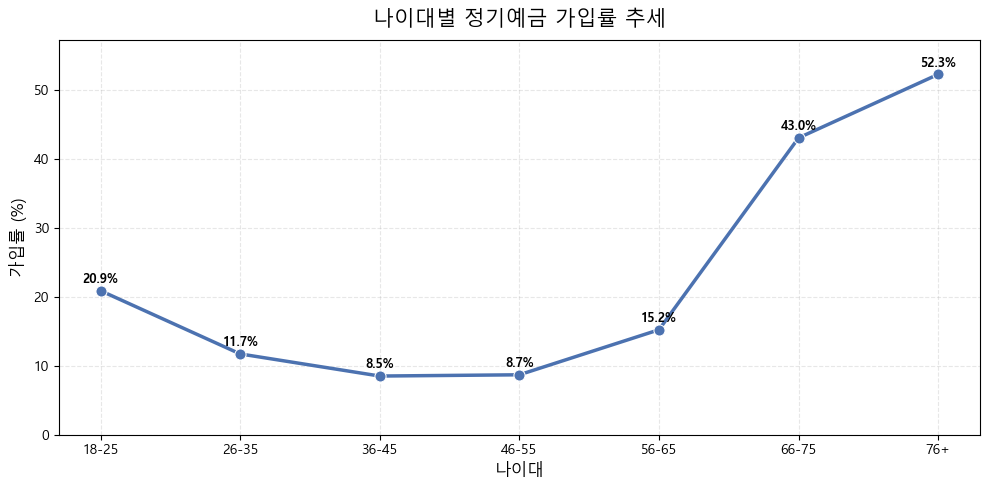

In [39]:
bins = [17, 25, 35, 45, 55, 65, 75, 95]  # 연령 구간
labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "66-75", "76+"]  # 범주 이름
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True)

# 나이대별 가입률(%) 계산
age_rate = (df.groupby("age_group")["y"].mean() * 100).reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=age_rate,
    x="age_group", y="y",
    marker="o", linewidth=2.5, markersize=8,
    color="#4C72B0"
)

for i, row in age_rate.iterrows():
    plt.text(
        i, row["y"] + 0.7,
        f"{row['y']:.1f}%",
        ha='center', va='bottom',
        fontsize=9, fontweight='bold'
    )

plt.title("나이대별 정기예금 가입률 추세", fontsize=15, pad=10)
plt.xlabel("나이대", fontsize=12)
plt.ylabel("가입률 (%)", fontsize=12)
plt.ylim(0, age_rate["y"].max() + 5)
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

- 25세 이하의 고객이나 56세 이상의 고객들에게서 가입률이 높게 확인됨.
- 직업군 별 가입률의 결과와 유의미한 상관관계를 보임
- 학생이 많은 25세 이하의 나이대나, 은퇴 이후 경제활동이 줄어든 고객들에게서 높은 가입률을 확인할 수 있음.

## 7) 경기 상황별 정기 예금 가입률
- 고용자 수와 고용변동률 데이터를 바탕으로 정기 예금 가입률을 확인.
- 두 수치 모두 높게 나오는 구간(경제 활성화 구간)에 정기 예금 가입률이 높을것으로 예상됨. (금리가 높고 고용이 안정되어 있기 때문)

C:\Users\Good-PC\AppData\Local\Temp\ipykernel_6040\3826385523.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=nr_employed_rate, x="nr.employed", y="y", palette="flare")


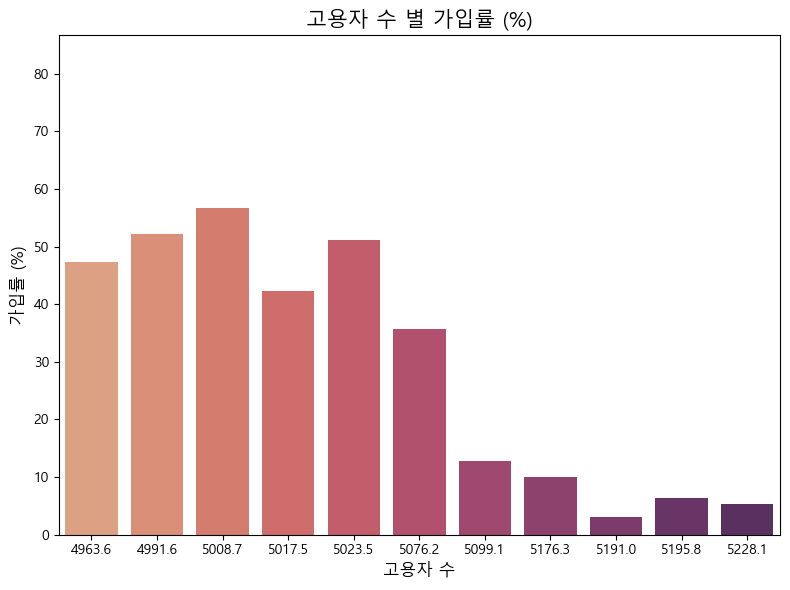

In [40]:
nr_employed_rate = (
    df.groupby("nr.employed")["y"]
      .mean() * 100
).reset_index().sort_values(by="y", ascending=False)

# 시각화
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=nr_employed_rate, x="nr.employed", y="y", palette="flare")


plt.title("고용자 수 별 가입률 (%)", fontsize=15)
plt.xlabel("고용자 수", fontsize=12)
plt.ylabel("가입률 (%)", fontsize=12)
plt.ylim(0, nr_employed_rate["y"].max() + 30)
plt.tight_layout()

C:\Users\Good-PC\AppData\Local\Temp\ipykernel_6040\2782948579.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["emp_bin", "empnum_bin"])["y"]


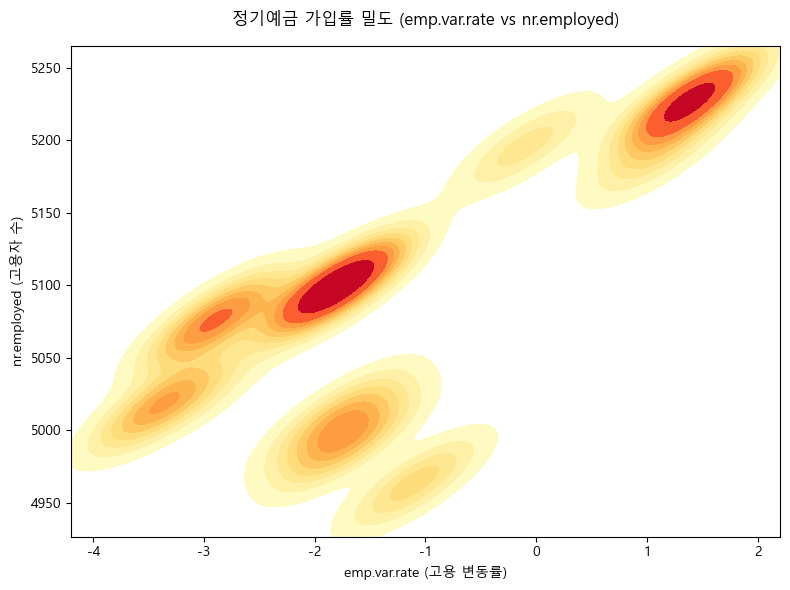

In [41]:
df["emp_bin"] = pd.qcut(df["emp.var.rate"], q=5, duplicates="drop")
df["empnum_bin"] = pd.qcut(df["nr.employed"], q=5, duplicates="drop")

# 두 변수의 조합별 평균 가입률 계산
pivot_table = (
    df.groupby(["emp_bin", "empnum_bin"])["y"]
      .mean()
      .reset_index()
      .pivot(index="emp_bin", columns="empnum_bin", values="y")
)

plt.figure(figsize=(8,6))
sns.kdeplot(
    data=df,
    x="emp.var.rate", y="nr.employed",
    weights=df["y"],  # 가입 여부 가중치
    fill=True, cmap="YlOrRd", thresh=0.05
)
plt.title("정기예금 가입률 밀도 (emp.var.rate vs nr.employed)", pad=15)
plt.xlabel("emp.var.rate (고용 변동률)")
plt.ylabel("nr.employed (고용자 수)")
plt.tight_layout()
plt.show()

# 3. EDA를 바탕으로 정기 예금 가입 가능성 예측

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from xgboost import XGBClassifier
from xgboost.callback import EarlyStopping
from lightgbm import LGBMClassifier
import lightgbm as lgb

## 1) 데이터 전처리

In [49]:
X = df.drop("y",axis=1)
y = df["y"]

# 쓸모없는 컬럼 제거 (특징 X에서만)
drop_cols = ["duration", "contact", "month", "day_of_week", "pdays", "default"]
X = X.drop(columns=drop_cols, errors="ignore")

cat_cols = X.select_dtypes(include=["object", "category"]).columns

# 3) 원-핫 인코더/컬럼트랜스포머 정의 (X만 변환)
ct = ColumnTransformer(
    transformers=[
        ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)

# 4) 학습/테스트 분할 (먼저 나누고, 학습셋으로 fit, 테스트셋은 transform만!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5) 변환 적용
X_train = ct.fit_transform(X_train)   # fit은 학습셋으로만
X_test  = ct.transform(X_test)        # 테스트셋에는 transform만

## 2) 모델 별 학습 및 검증

In [64]:
# ✅ XGBoost 설정
pos = y_train.sum()
neg = len(y_train) - pos
scale_pos_weight = neg / pos

xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    objective="binary:logistic",
    eval_metric="auc",
    scale_pos_weight=scale_pos_weight,
    tree_method="hist"
)
xgb_model.fit(X_train, y_train)

# ✅ RandomForest 설정
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# ✅ LightGBM 설정
lgb_model = LGBMClassifier(
    n_estimators=700,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    class_weight=None  # 불균형 보정이 필요하면 "balanced" 고려
)

lgb_model.fit(X_train, y_train)

# ✅ 예측
xgb_pred = xgb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
lgb_pred  = lgb_model.predict(X_test)

# ✅ 확률 예측 (AUC 계산용)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]
rf_proba = rf_model.predict_proba(X_test)[:, 1]
lgb_proba = lgb_model.predict_proba(X_test)[:, 1]

# ✅ 성능 비교
print("=== XGBoost ===")
print("Accuracy :", accuracy_score(y_test, xgb_pred))
print("ROC-AUC  :", roc_auc_score(y_test, xgb_proba))
print(classification_report(y_test, xgb_pred, digits=4))

print("\n=== RandomForest ===")
print("Accuracy :", accuracy_score(y_test, rf_pred))
print("ROC-AUC  :", roc_auc_score(y_test, rf_proba))
print(classification_report(y_test, rf_pred, digits=4))

print("\n=== LightGBM ===")
print("Accuracy :", accuracy_score(y_test, lgb_pred))
print("ROC-AUC  :", roc_auc_score(y_test, lgb_proba))
print(classification_report(y_test, lgb_pred, digits=4))

[LightGBM] [Info] Number of positive: 3712, number of negative: 29238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 489
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112656 -> initscore=-2.063898
[LightGBM] [Info] Start training from score -2.063898


c:\Users\Good-PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Good-PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


=== XGBoost ===
Accuracy : 0.8436513716921583
ROC-AUC  : 0.8038333176093212
              precision    recall  f1-score   support

           0     0.9521    0.8674    0.9078      7310
           1     0.3859    0.6562    0.4860       928

    accuracy                         0.8437      8238
   macro avg     0.6690    0.7618    0.6969      8238
weighted avg     0.8883    0.8437    0.8603      8238


=== RandomForest ===
Accuracy : 0.8936635105608157
ROC-AUC  : 0.7800163038350866
              precision    recall  f1-score   support

           0     0.9135    0.9722    0.9419      7310
           1     0.5568    0.2748    0.3680       928

    accuracy                         0.8937      8238
   macro avg     0.7351    0.6235    0.6550      8238
weighted avg     0.8733    0.8937    0.8773      8238


=== LightGBM ===
Accuracy : 0.8975479485311969
ROC-AUC  : 0.7967597970423133
              precision    recall  f1-score   support

           0     0.9111    0.9802    0.9444      7310
 

- XGBoost

장점: 재현율(0.65) 가장 높음 → 실제 가입자를 놓치지 않음

단점: 정밀도(0.38)가 낮음 → 가입 안 할 사람을 가입자로 착각함

활용 추천: “가입자를 최대한 많이 찾아야 하는” 상황 (예: 마케팅 캠페인)

 “찾을 수 있는 한 많이 찾아라” 전략에 적합합니다.

- RandomForest

장점: 전체 정확도와 음성 클래스 예측은 뛰어남

단점: 가입자(1) 재현율이 0.27로 매우 낮음

활용 추천: “잘못된 예측을 최소화”해야 하는 상황 (보수적 분류)

 즉, “가입하지 않을 사람은 거의 틀리지 않는다”
하지만 “가입할 사람은 대부분 놓친다”.

- LightGBM

장점: 정확도(0.898), 정밀도(0.61) 우수

단점: 재현율(0.25)이 낮음 → 실제 가입자 대부분을 놓침

활용 추천: “정확히 맞출 때만 행동하는 전략” (예: 고비용 프로모션 최소화)

 “예측이 맞을 때만 연락해도 된다”는 전략이면 LightGBM이 유리합니다.


- Threshold 조정.

F1 최대 임계값: 0.6476,  Precision=0.473, Recall=0.595, F1=0.527
              precision    recall  f1-score   support

           0     0.9468    0.9159    0.9311      7310
           1     0.4730    0.5948    0.5270       928

    accuracy                         0.8797      8238
   macro avg     0.7099    0.7553    0.7290      8238
weighted avg     0.8935    0.8797    0.8856      8238



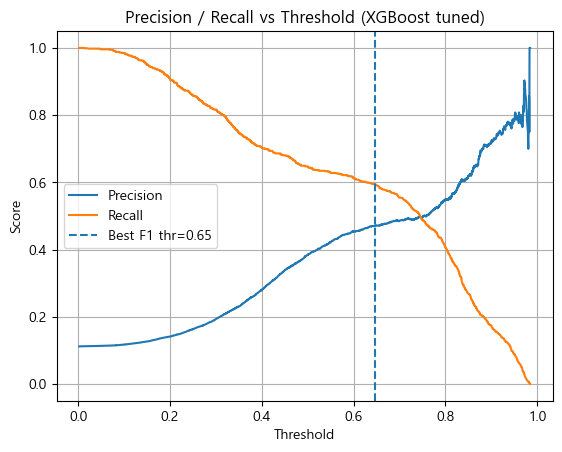

In [ ]:
# gpt에 정확도를 더 높일 수 있는 방안을 물어보니 Threshold 조정을 제안했다. 다른 모델은 아직 미정.

prec, rec, thr = precision_recall_curve(y_test, y_proba_tuned)
# precision_recall_curve가 반환하는 thresholds 길이는 n-1이므로 f1도 n-1에 맞춰 계산
f1 = 2 * prec[:-1] * rec[:-1] / (prec[:-1] + rec[:-1] + 1e-12)
best_idx = np.argmax(f1)
best_thr_f1 = thr[best_idx]

print(f"F1 최대 임계값: {best_thr_f1:.4f},  Precision={prec[best_idx]:.3f}, Recall={rec[best_idx]:.3f}, F1={f1[best_idx]:.3f}")

# 적용
y_pred_best = (y_proba_tuned >= best_thr_f1).astype(int)
prec, rec, thr = precision_recall_curve(y_test, y_proba_tuned)

plt.plot(thr, prec[:-1], label="Precision")
plt.plot(thr, rec[:-1],  label="Recall")
plt.axvline(best_thr_f1, linestyle="--", label=f"Best F1 thr={best_thr_f1:.2f}")
plt.xlabel("Threshold"); plt.ylabel("Score")
plt.title("Precision / Recall vs Threshold (XGBoost tuned)")
plt.legend(); plt.grid(True); plt.show()

- 정밀도(Precision)와 재현율(Recall)의 균형(F1-Score)이 가장 높은 지점인 곳의 Threshold 확인.

In [55]:
# threshold 조정 후 성능
y_pred_best = (y_proba_tuned >= best_thr_f1).astype(int)

print("\n=== 조정 후 성능 ===")
print(classification_report(y_test, y_pred_best, digits=4))


=== 조정 후 성능 ===
              precision    recall  f1-score   support

           0     0.9468    0.9159    0.9311      7310
           1     0.4730    0.5948    0.5270       928

    accuracy                         0.8797      8238
   macro avg     0.7099    0.7553    0.7290      8238
weighted avg     0.8935    0.8797    0.8856      8238



- 최적화 완료 (사실 한계에 부딪힘)
- 예측에 영향을 크게 미친 변수들에 대해 알아보고 정기 예금 가입자 예측을 위한 인사이트 도출해보자.

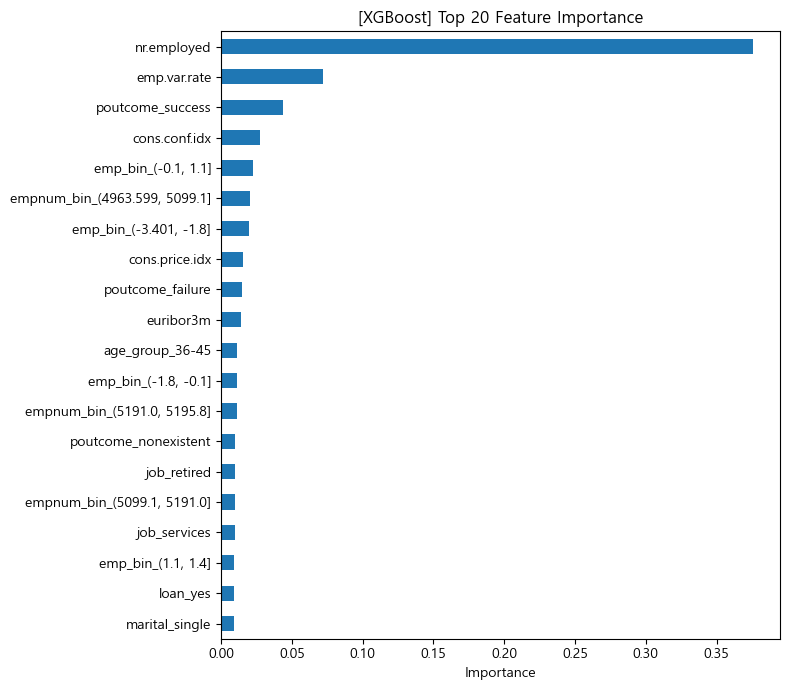

In [56]:
feature_names = ct.get_feature_names_out()

def plot_top_importances(model, feature_names, topn=20, title="Feature Importance (one-hot level)"):
    importances = model.feature_importances_
    s = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(topn)
    plt.figure(figsize=(8, max(4, topn*0.35)))
    s.iloc[::-1].plot(kind="barh")
    plt.title(title)
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

plot_top_importances(xgb_tuned, feature_names, topn=20, title="[XGBoost] Top 20 Feature Importance")

- 모델이 정기 예금 가입 가능성을 예측할 때 가장 크게 참고하는 변수는 고용자 수 & 고용 변동률인 것으로 확인.
- 두 변수가 높을 수록 가입 가능성이 높은것을 확인
- 이전 캠페인의 성공여부가 두번 째 요인 변수인것을 확인
- 해당 요인 변수들을 토대로 정기 예금 가입 가능성을 높일 수 있는 마케팅 방법 파악.
